In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

In [2]:
!pip install pandas --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
global_power_plant_raw_df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [4]:
global_power_plant_raw_df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
global_power_plant_raw_df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
global_power_plant_raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Using the info() function a short summary of the global power plant dataframe is made and print the information about the datafram including the index dtype and column dtypes, non-null values and memory usage.



In [7]:
selected_column = [
    'country',
    'country_long',
    'name',
    'capacity_mw',
    'primary_fuel',
    'other_fuel1',
    'other_fuel2',
    'other_fuel3',
    'commissioning_year',
    'year_of_capacity_data',
    'generation_gwh_2013',
    'generation_gwh_2014',
    'generation_gwh_2015',
    'generation_gwh_2016',
    'generation_gwh_2017',
    'estimated_generation_gwh'
]

The global database of power plants contains a lot of resources, but in this step we are going to restrict the study of columns, such as the type of use of fuel, plants belong to which country, year of the plant operation, estimate generation of power plant, etc. There are 16 columns that have been chosen for review.

In [8]:
len(selected_column)


16

In [9]:
global_power_plant_df = global_power_plant_raw_df[selected_column].copy()


In [10]:
global_power_plant_df.sample(5)


,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
878,IND,India,VIJESWARAM GT,272.3,Gas,NaN,NaN,NaN,1995.0,2019.0,NaN,638.9885,693.874313,669.578138,1156.305799,NaN
199,IND,India,Diwakar,100.0,Solar,NaN,NaN,NaN,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,IND,India,UMTRU (NEW),11.2,Hydro,NaN,NaN,NaN,1957.0,2019.0,NaN,NaN,NaN,NaN,NaN,NaN
426,IND,India,LOKMANGAL SUGAR ETHANOL,31.5,Biomass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,IND,India,MUNOLI DISTILLERY,11.2,Biomass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using sample(x) method x random row of power plants data from the datafram are shown.



In [11]:
global_power_plant_df.describe()


,capacity_mw,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,907.000000,0.0,527.000000,519.0,0.0,398.000000,422.000000,434.000000,440.000000,0.0
mean,326.223755,NaN,1997.091082,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,NaN
std,590.085456,NaN,17.082868,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,NaN
min,0.000000,NaN,1927.000000,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,NaN,1988.000000,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,NaN
50%,59.200000,NaN,2001.000000,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,NaN
75%,385.250000,NaN,2012.000000,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,NaN
max,4760.000000,NaN,2018.000000,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,NaN


There are some power plants that has negative generation of power. It seems like a mistake in the dataset but there are some power plant those consume more energy than they are produce.



In [16]:
global_power_plant_df[global_power_plant_df.generation_gwh_2013 == 0.0]


,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh


Hydro power plant generates electricity from turbine-driven generators that transform the potential energy of falling or fast-flowing water into mechanical energy.The Bath County is a pumped storage power plant. Plants require electrical energy to pump uphill water, there are net negative electricity generation balances for this pumped storage hydro plants.



Exploratory Analysis and Visualization


In [17]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [18]:
global_power_plant_df.country_long.nunique()


1

Let's look up at top 20 countries with heights amount of power plants.


In [19]:
countries_plant = global_power_plant_df.country_long.value_counts().head(20)
countries_plant

country_long
India    907
Name: count, dtype: int64

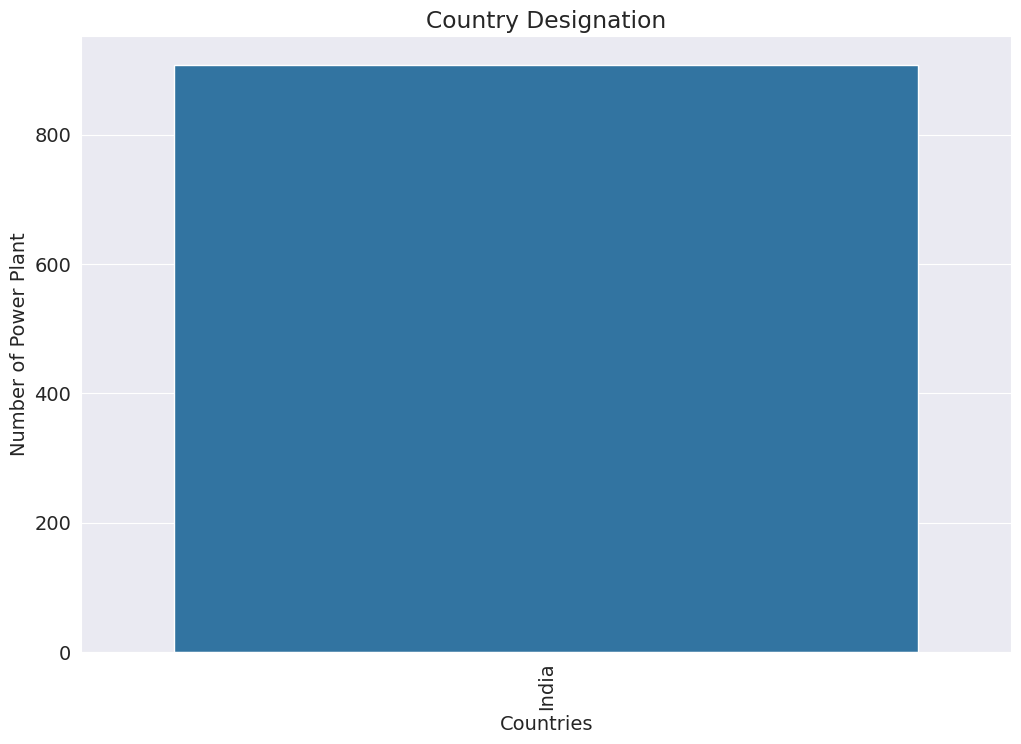

In [20]:
sns.barplot(x = countries_plant.index, y = countries_plant)
plt.xticks(rotation = 90)
plt.title('Country Designation')
plt.ylabel('Number of Power Plant')
plt.xlabel('Countries');

Fuel use in power plant.


Various types of fuel are used in the power plant, which can be classified as primary fuel, other fuel-1, other fuel-2, etc. Primary fuel is used to run the main turbine to generate electricity and other fuels are used to run auxiliary machines to support the generation process.



In [21]:
main_primary_fuel = global_power_plant_df.primary_fuel.value_counts() * 100 / global_power_plant_df.primary_fuel.count()
main_primary_fuel

primary_fuel
Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: count, dtype: float64

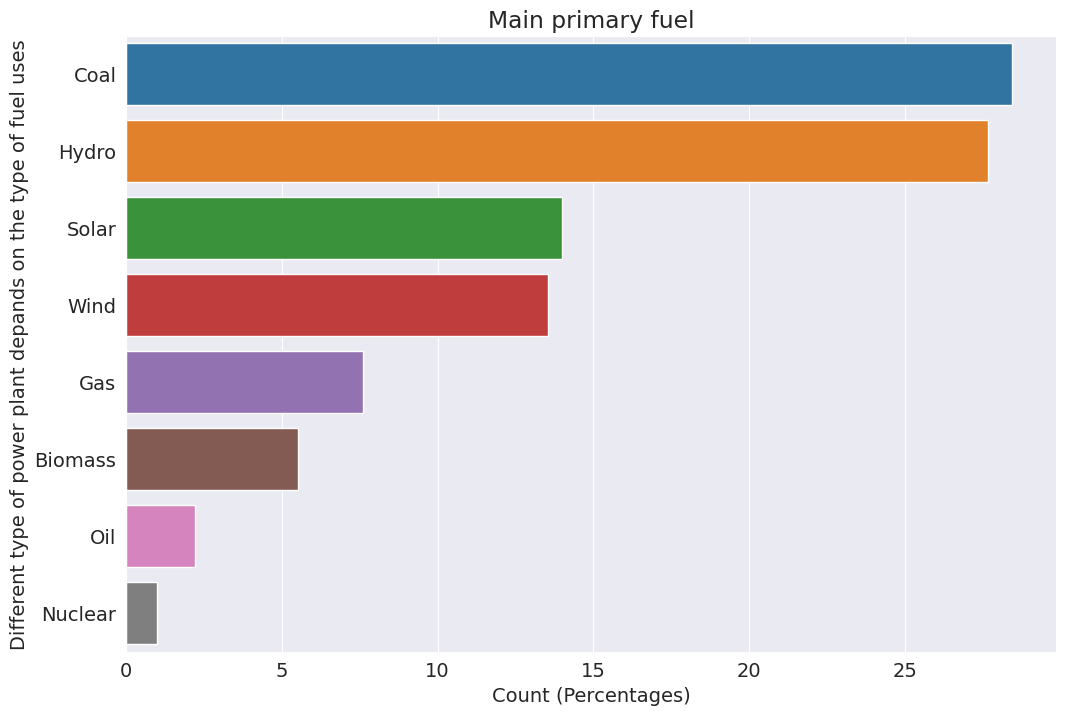

In [22]:
sns.barplot(x = main_primary_fuel, y = main_primary_fuel.index)
plt.title('Main primary fuel')
plt.xlabel('Count (Percentages)');
plt.ylabel('Different type of power plant depands on the type of fuel uses');

Renewable energy-based power plants have higher percentages that are beneficial to our future generation. Global warming is the next major threat that we all have to face. It is a good sign that the use of hydro, solar and wind power plants is increasing.



Type of power plant and their capacity


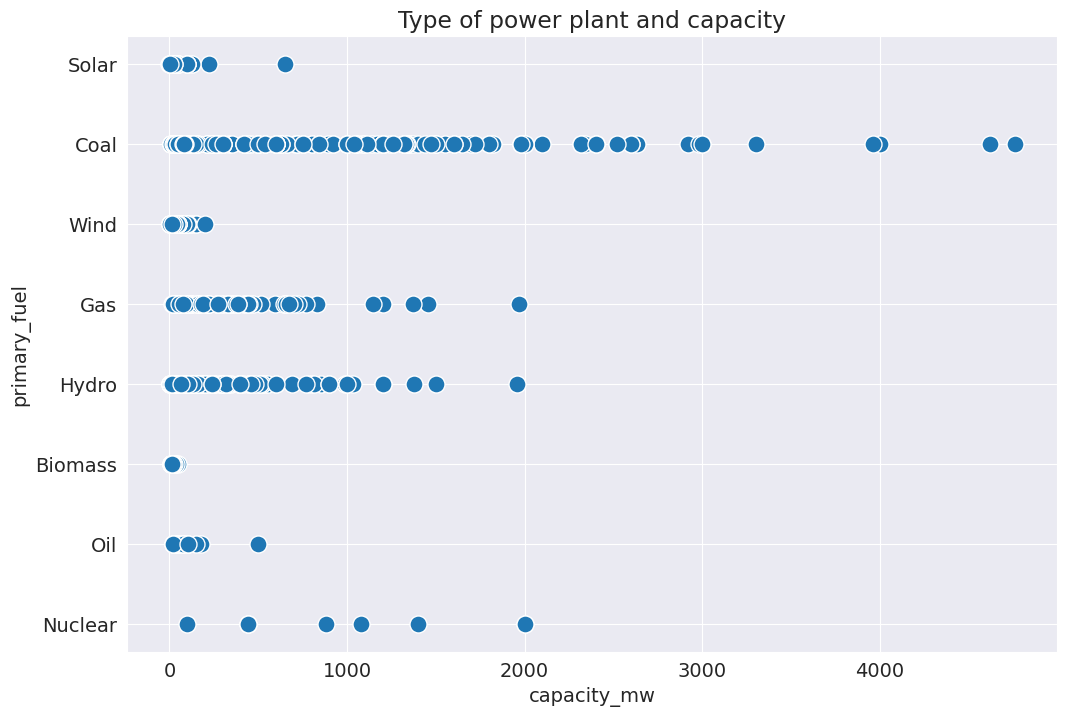

In [23]:
sns.scatterplot(x = global_power_plant_df.capacity_mw, y = global_power_plant_df.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

The Hydro Power Plant has most of the high-capacity power plant. There is only 0.67 per cent of the nuclear power plant, but the capacity of the power plant is high. In spite of having a higher percentage, the solar power plant has a small capacity.



Capacity of generating power in the top 20 countries.


In [24]:
countries_capacity = global_power_plant_df.groupby('country_long')[['capacity_mw']].sum().sort_values('capacity_mw', ascending = False).head(20)
countries_capacity


,capacity_mw
country_long,
India,295884.946


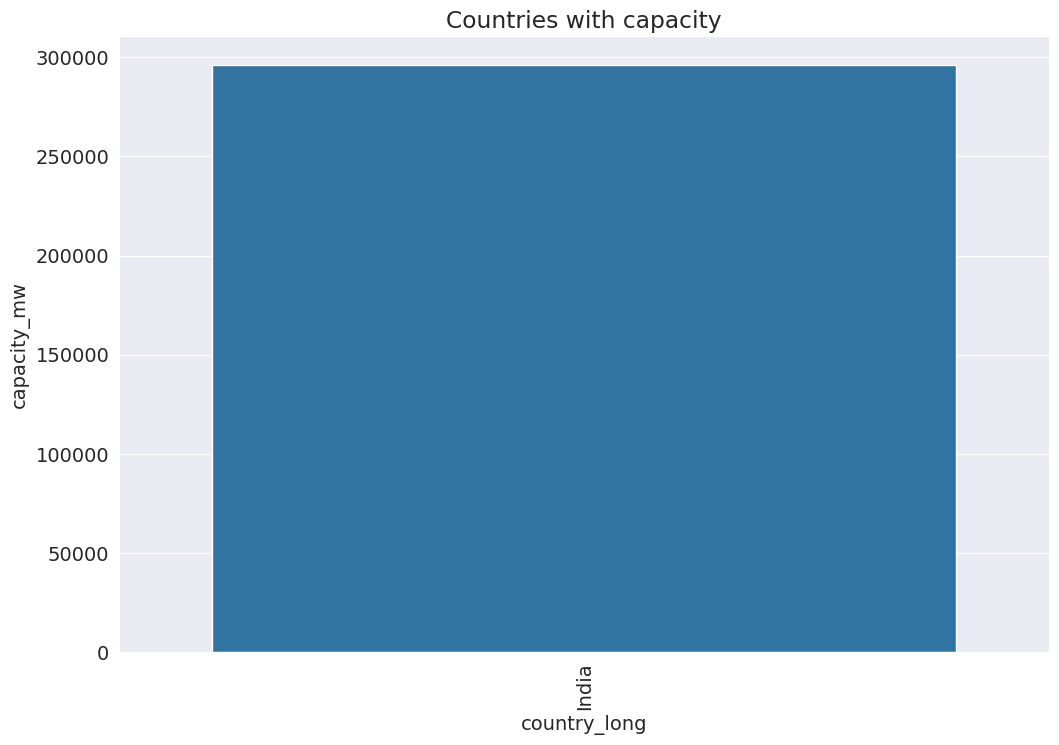

In [25]:
sns.barplot(x = countries_capacity.index, y = countries_capacity.capacity_mw)
plt.xticks(rotation = 90)
plt.title('Countries with capacity');


Different type of primary fuel based power plant and their year of going to the first operation.


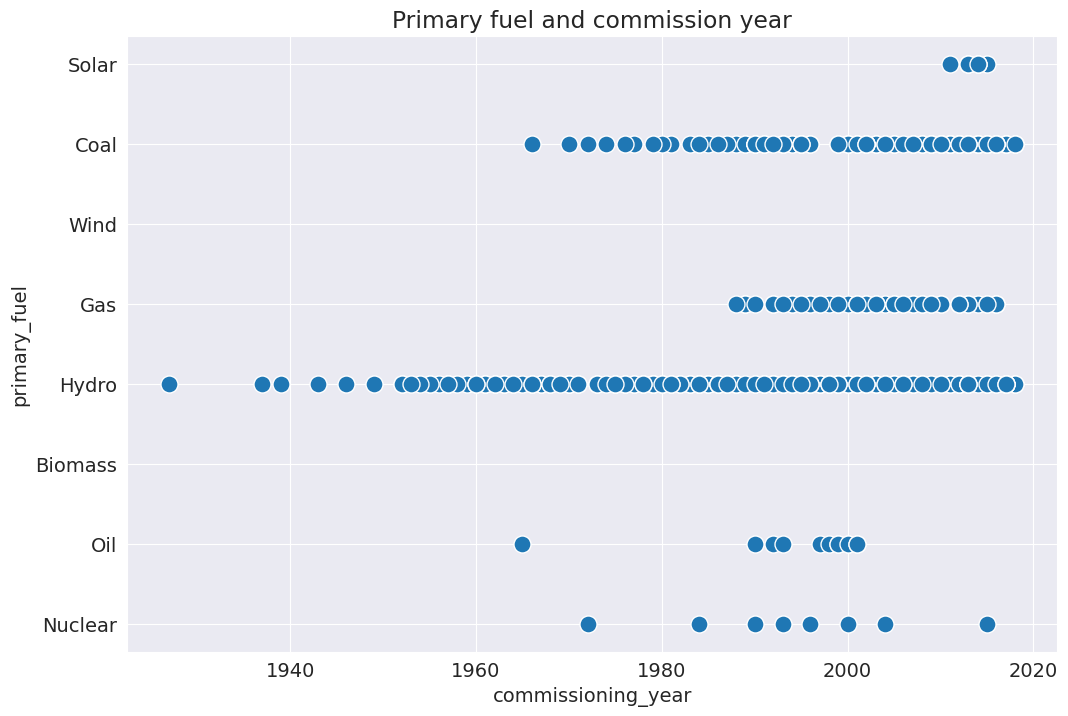

In [26]:
sns.scatterplot(x = global_power_plant_df.commissioning_year, y = global_power_plant_df.primary_fuel, s = 150);
plt.title('Primary fuel and commission year');

Let find out what types of primary fuels power plants were used in the dataset by using unique() method.



In [27]:
global_power_plant_df.primary_fuel.unique()


array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [30]:
bd_power_plant = global_power_plant_df[global_power_plant_df.country_long == 'India']


In [31]:
total_power_plant = bd_power_plant.country_long.value_counts()
total_power_plant


country_long
India    907
Name: count, dtype: int64

There are 907 (runing) power plant in Bangaldesh.



In [32]:
total_capacity = bd_power_plant.capacity_mw.sum()
print('India has total capacity of {} megawatt.'.format(total_capacity))

India has total capacity of 295884.946 megawatt.


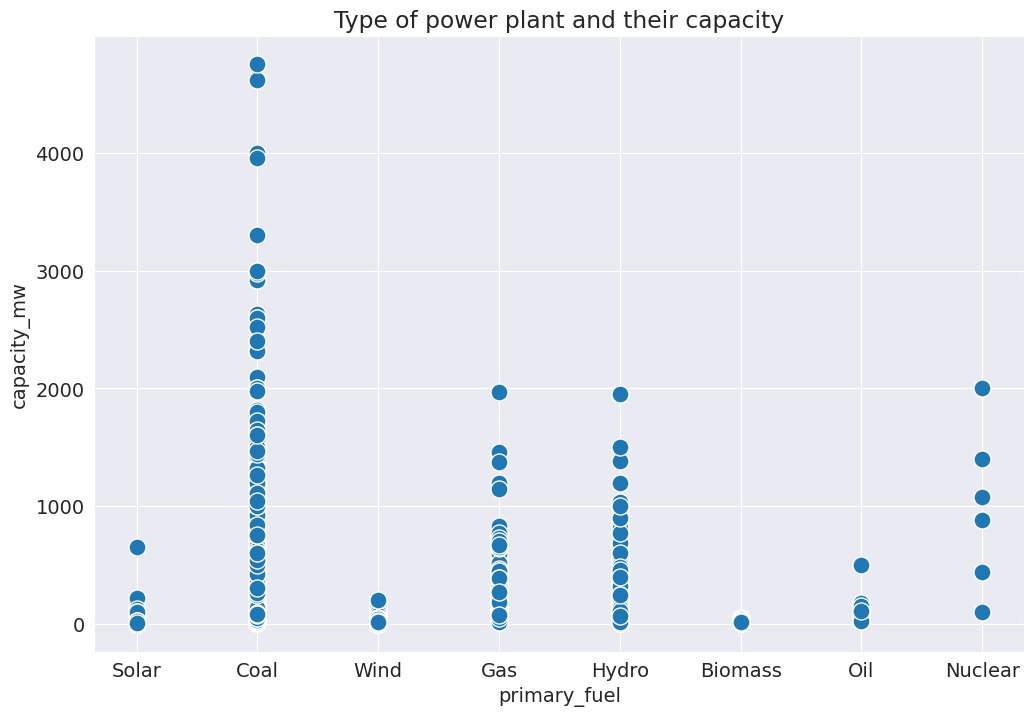

In [33]:
sns.scatterplot(x = bd_power_plant.primary_fuel, y = bd_power_plant.capacity_mw, s = 150)
plt.title('Type of power plant and their capacity');


Inferences and Conclusions


This analysis gives us an insight into the depth of power plants around the world. How the world produces one of the most important elements, as the country's economic and overall infrastructure depends on electricity.

The world is facing global warming, and pollution from power plants is one of the reasons for this. We need to control pollution and urge on countries around the world to build more renewable or green energy power plants.